In [1]:
import lxml.html
import requests
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options
import pandas as pd
from urllib.parse import urljoin
import numpy as np
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from time import sleep
from sklearn.feature_extraction.text import TfidfTransformer
import time

# 데이터 수집

In [2]:
# 무신사 월별 랭킹 페이지에서 상의 또는 하의를 정한다. 그 페이지의 url이다.
url='https://www.musinsa.com/ranking/best?period=month&age=ALL&mainCategory=003&subCategory=&leafCategory=&price=&golf=false&kids=false&newProduct=false&exclusive=false&discount=false&soldOut=false&page=1&viewType=small&priceMin=&priceMax='
res=requests.get(url)
root=lxml.html.fromstring(res.text)
urls=[]
for a in root.cssselect('.img-block'):
    urls.append(a.attrib['href'])

In [3]:
start = time.time()
options = Options()
# chrome을 전체화면으로 넓히는 옵션입니다.
options.add_argument('--start-maximized')
# executable_path에는 chromedriver 실행 파일의 경로를 넣고, chrome_options에는 options 변수를 넣습니다.
time.sleep(1)

driver  = Chrome(executable_path=r"C:\Users\JangSeongHyun\Desktop\국민대학교\3-1\텍데분\chromedriver_win32\chromedriver.exe", chrome_options=options)

<ipython-input-3-0c826a4a3486>:8: DeprecationWarning: use options instead of chrome_options
  driver  = Chrome(executable_path=r"C:\Users\JangSeongHyun\Desktop\국민대학교\3-1\텍데분\chromedriver_win32\chromedriver.exe", chrome_options=options)


In [4]:
driver.get(urls[0])

In [5]:
close=driver.find_elements_by_css_selector('div.Commonstyled__PreviewCloseButton-sc-1uivlpa-3.jOVdaf')
close[0].click()

In [8]:
close=driver.find_elements_by_css_selector('div.wrap-suggest-join a.btn-close')
close[0].click()

In [9]:
reviews=driver.find_elements_by_css_selector('div.review-contents div.review-contents__text')
reviews_star=driver.find_elements_by_css_selector('span.review-list__rating__active')

In [10]:
for i in range(len(reviews)):
    if reviews_star[i].get_attribute('style')[9] == '%':
        print(i,'번째 리뷰, 별점: ',int(reviews_star[i].get_attribute('style')[7:9])/20,'점')
        print(reviews[i].text)
        print('')
    else:
        print(i,'번째 리뷰, 별점: ',int(reviews_star[i].get_attribute('style')[7:10])/20,'점')
        print(reviews[i].text)
        print('')

0 번째 리뷰, 별점:  5.0 점
재질이 톡톡하고 안에 기모가 있어서 따뜻하고 편해요

1 번째 리뷰, 별점:  4.0 점
상품이좋아요재구매의사있음 핏도좋고마으에들어요

2 번째 리뷰, 별점:  5.0 점
전에것과 사이즈가 같은걸로 알고있는데 살짝 더 큽니다! 허리는 흘러내리지는 않아서 수선인했고 밑에 단 한개만 수선했는데 딱 적당한거같아용

3 번째 리뷰, 별점:  5.0 점
따뜻하고 핏도 좋아요 구김현상도 없고 맘에듭니다
기모가 진짜 겨울에 좋아요

4 번째 리뷰, 별점:  5.0 점
핏은 너무심하지않은와이드핏입니다.
기모라많이따듯하고(실내에선 땀참^-^;)
기모없는버전도구매예정입니다

5 번째 리뷰, 별점:  5.0 점
기장과 두께 다 괜찮은데 허리가 커서 난감ㅠ
핏은 예뻐요

6 번째 리뷰, 별점:  5.0 점
기모라서 따듯하고 핏도 이뻐요!
올겨울에 이쁘고 따듯하게 잘 지나갈것같아요!

7 번째 리뷰, 별점:  5.0 점
예쁜대 후리하기보다는 정장같은 느낌납니당 엉덩이 낑긴다는 얘기있어서 한사이즈업했는데 좋아요

8 번째 리뷰, 별점:  5.0 점
따뜻하고 색이 이뻐서 어디에나 잘 어울리는거 같아요

9 번째 리뷰, 별점:  5.0 점
마른체형이라 살짝 바지통이 큰감은 있지만 신경쓰일정도는 아니예요 두꺼워서 겨울에 따뜻하게 입을수 있을꺼 같아요.



In [11]:
next_page = driver.find_elements_by_css_selector('div.pagination.textRight a.paging-btn.btn')

In [12]:
next_page=next_page[3:-1]

In [15]:
next_page[1].click()

StaleElementReferenceException: Message: stale element reference: element is not attached to the page document
  (Session info: chrome=97.0.4692.71)


In [140]:
for i in range(len(next_page)):
    next_page[i].click()
    time.sleep(4)

StaleElementReferenceException: Message: stale element reference: element is not attached to the page document
  (Session info: chrome=97.0.4692.71)


In [ ]:
# url_num 는 페이지 넘버를 정하는 것이자 랭킹을 정해주기 위한 변수
url_num=0
# 리뷰 리스트
review_list=[]
# 별점 리스트
score_list=[]
# 랭킹 리스트
rank_list=[]
# 소분류 리스트
small_select=[]
# 대분류 리스트
big_select=[]
# 가격 리스트
price=[]
# 브랜드 리스트
brand=[]

#몇개의 리뷰 데이터를 구했는지 알기 위한 변수
review_before=0

# 90등까지 반복하는 문장
for num in range(90):
    # 시작 시간 저장
    start = time.time()
    options = Options()
    # chrome을 전체화면으로 넓히는 옵션입니다.
    options.add_argument('--start-maximized')
    # executable_path에는 chromedriver 실행 파일의 경로를 넣고, chrome_options에는 options 변수를 넣습니다.
    time.sleep(1)
    
    driver  = Chrome(executable_path='./chromedriver', chrome_options=options)
    time.sleep(1)
    # url 1번째부터 셀레늄을 이용해 창 띄운다.
    driver.get(urls[num])
    # 반복문 실행마다 다음 url을 실행시키기 위한 문장
    url_num+=1
    time.sleep(1)
    
    # 광고 끄기
    close=driver.find_elements_by_css_selector('div.wrap-suggest-join a.btn-close')
    close[0].click()
    time.sleep(1)


    #더 보기 누르기
    more=driver.find_elements_by_css_selector('div.wrap review_list_detail style_review div.cArea span.more-view')
    mo=0
    if len(more) !=0:
        # 더 보기의 개수를 mo에 저장한다.
        mo=len(more)
        for m in range(len(more)):
            more[m].click()
    time.sleep(1)

    # 리뷰 텍스트의 태그
    reviews=driver.find_elements_by_css_selector('div.galleryList.gallery_store.review-wrap div.nslist_post.area-gallery-post.review-list span.content-review')
    # 리뷰 페이지 태그
    review_button=driver.find_elements_by_css_selector('div.nslist_bottom div.pagination.textRight a.paging-btn.btn')

    # 리뷰 페이지 태그가 중복이 많다. 분석해보니 그 태그가 30개가 넘어야 리뷰페이지버튼이 있다.
    if len(reviews) >=30:
        # 리뷰 페이지 태그(중복 포함)가 총 32개이고, 무신사스탠다드의 제품의 경우 33개였다. 그래서 두가지 상황을 만들었다.
        if len(review_button) !=32:
            # 페이지 당 텍스트는 10개이다.10~20까지 태그가 텍스트이다. 
            # 더 보기를 누르면 텍스트가 더 보기 텍스트를 기준으로 하나씩 밀려난다. 그래서 하나씩 더 부른 것이다.
            for r in range(10,20+mo):
                # 더 보기로 밀려났을 때 둘 중 하나는 빈칸이다. 그래서 빈칸은 제외시키고 리스트에 넣는다.
                if reviews[r].text != '':
                    review_list.append(reviews[r].text)
        else:
            for r in range(11,21+mo):
                #텍스트 부르기
                if reviews[r].text != '':
                    review_list.append(reviews[r].text)
        time.sleep(0.5)


        # 별점 데이터는 태그를 찾아봤을 때 5점이면 10, 4점이면 8 이렇게 되어있다. 그래서 2로 나눠준 값을 저장해준다.
        scores=driver.find_elements_by_css_selector('div.galleryList.gallery_store.review-wrap div.nslist_post.area-gallery-post.review-list span.score.score')
        for s in range(10,20):
            #별점 데이터가 있는 위치이다.
            score_list.append(int(scores[s].get_attribute("class")[11:13])/2)

        # 몇등 상품인지 저장하기
        for ra in range(10,20):
            rank_list.append(url_num)

        # 페이지 넘기기
        # 리뷰 페이지 태그(중복 포함)개수가  여러 종류가 있었다. 규칙은 일정하다. 모든 경우의 수를 지정하였다.
        # 각 상품별 리뷰가 몇 페이지까지 있는지 나와있는 텍스트에서 숫자만 빼서 page변수에 지정하였다.
        if len(review_button) ==32:
            num_list=[17,18,19,20,21,17,18,19,20,21,17,18,19,20,21,17,18,19,20]
            page=int(driver.find_elements_by_css_selector('div.box_page_msg')[-2].text[:-12].replace(',','')) 
        elif len(review_button) == 34:
            num_list=[19,20,21,22,23,19,20,21,22,23,19,20,21,22,23,19,20,21,22]
            page=int(driver.find_elements_by_css_selector('div.box_page_msg')[-2].text[:-12].replace(',',''))      
        elif  len(review_button) == 33:
            num_list=[18,19,20,21,22,18,19,20,21,22,18,19,20,21,22,18,19,20,21,22]
            page=int(driver.find_elements_by_css_selector('div.box_page_msg')[-2].text[:-12].replace(',',''))  
        else:
            num_list=[12,13,14,15,16,12,13,14,15,16,12,13,14,15,16,12,13,14,15]
            page=int(driver.find_elements_by_css_selector('div.box_page_msg')[-2].text[:-12].replace(',',''))
        
        # 리뷰 페이지를 넘기는 문장이다. 페이지가 20페이지가 되지 않는 경우를 지정한 것이다.
        # 페이지 넘기는 것을 반복하고 넘긴 후에는 위와 같은 내용이다.
        if page <20:
            for n in num_list[:page-1]:
                review_button=driver.find_elements_by_css_selector('div.nslist_bottom div.pagination.textRight a.paging-btn.btn')
                review_button[n].click()
                time.sleep(2)
                #더 보기
                more=driver.find_elements_by_css_selector('div.wrap review_list_detail style_review div.cArea span.more-view')
                mo=0
                if len(more) !=0:
                    mo=len(more)
                    for m in range(len(more)):
                        more[m].click()
                time.sleep(1)
                #리뷰
                reviews=driver.find_elements_by_css_selector('div.galleryList.gallery_store.review-wrap div.nslist_post.area-gallery-post.review-list span.content-review')
                for r in range(10,20+mo):
                    if reviews[r].text != '':
                        review_list.append(reviews[r].text)
                time.sleep(0.5)
                #별점
                scores=driver.find_elements_by_css_selector('div.galleryList.gallery_store.review-wrap div.nslist_post.area-gallery-post.review-list span.score.score')
                for s in range(10,20):
                    score_list.append(int(scores[s].get_attribute("class")[11:13])/2)
                # 랭킹
                for ra in range(10,20):
                    rank_list.append(url_num)
        else:
            for n in num_list:
                review_button=driver.find_elements_by_css_selector('div.nslist_bottom div.pagination.textRight a.paging-btn.btn')
                review_button[n].click()
                time.sleep(2)
                #더보기
                more=driver.find_elements_by_css_selector('div.wrap review_list_detail style_review div.cArea span.more-view')
                mo=0
                if len(more) !=0:
                    mo=len(more)
                    for m in range(len(more)):
                        more[m].click()
                time.sleep(1)
                #리뷰
                reviews=driver.find_elements_by_css_selector('div.galleryList.gallery_store.review-wrap div.nslist_post.area-gallery-post.review-list span.content-review')
                for r in range(10,20+mo):
                    if reviews[r].text != '':
                        review_list.append(reviews[r].text)
                time.sleep(0.5)
                #별점
                scores=driver.find_elements_by_css_selector('div.galleryList.gallery_store.review-wrap div.nslist_post.area-gallery-post.review-list span.score.score')
                for s in range(10,20):
                    score_list.append(int(scores[s].get_attribute("class")[11:13])/2)
                # 랭킹
                for ra in range(10,20):
                    rank_list.append(url_num)
    
    else:
        pass
    #상품의 소분류, 대분류, 가격을 찾아서 각 변수에 지정한 후 리뷰리스트의 개수만큼 각 리스트에 넣어주었다.
    select=driver.find_elements_by_css_selector('p.item_categories')
    price_new=driver.find_elements_by_css_selector('span.product_article_price')
    select_new=select[0].text.replace(' ','')
    price_new2=int(price_new[0].text.split('원')[0].split(',')[0]+price_new[0].text.split('원')[0].split(',')[1])
    for i in range(len(review_list)-review_before):
        big_select.append(select_new.split('>')[0])
        small_select.append(select_new.split('>')[1].split('(')[0])
        brand.append(select_new.split('>')[1].split('(')[1].replace(')',''))
        price.append(price_new2)
    score_list=score_list[0:len(review_list)]
    rank_list=rank_list[0:len(review_list)]
    for i in range(len(review_list)):
        #줄바꿈을 '. '으로 바꾸어 주었다.
        review_list[i]=review_list[i].replace('\n',". ")
    #각 상품의 크롤링이 끝나면 몇등 상품몇개의에  리뷰인지 시간은 얼마나 걸렸는지 알려준다.
    print(url_num,'등 상품')
    print('총',len(review_list)-review_before,'개의 리뷰')
    review_before=len(review_list)
    print("time :", time.time() - start)
    print('')
    time.sleep(2.5)

In [111]:
# 얻은 데이터들을 각자 열 이름을 정하여 데이터프레임 형식으로 만들어준다.
reviews_new=pd.DataFrame({'document':review_list, 'score':score_list,'rank':rank_list,'big_select':big_select,
                          'small_select':small_select,'brand':brand,'price':price})

In [3]:
# 만들어 놓은 270등까지의 상의 데이터
reviews_top=pd.read_csv('reviews_top.csv')

In [4]:
# 만들어 놓은 270등까지의 하의 데이터
reviews_pant=pd.read_csv('reviews_pant.csv')

# 전처리

상의 하의 데이터를 전처리 하기 위하여 먼저 합쳐준다

In [6]:
reviews=pd.concat([reviews_top, reviews_pant],axis=0,ignore_index=True)

중복된 리뷰 제거

In [7]:
reviews.drop_duplicates(['document'], keep = 'first', inplace = True, ignore_index=True)

In [8]:
reviews.head()

,document,score,rank,big_select,small_select,brand,price
0,가볍고 핏이 낙낙해서 레이어드로도 단일로도 잘 입을 수 있겠어요.,5.0,1,상의,반팔티셔츠,커버낫,43000
1,m사려다 후기보고 s샀는데 s가 딱 맞네요 얇아서 여름에 입기 좋을거같고 가성비 좋...,4.0,1,상의,반팔티셔츠,커버낫,43000
2,검은색 반팔이 없어서 샀는데 너무 잘 산거 같아요. 흰색도 이쁘고 살짝 비춰지긴 한...,4.0,1,상의,반팔티셔츠,커버낫,43000
3,깔끔하고 편해서 매일입네요 너무 좋아요 가격도 좋아요,5.0,1,상의,반팔티셔츠,커버낫,43000
4,재질이 너무마음에들어요 싼값에 잘건져갑니다,5.0,1,상의,반팔티셔츠,커버낫,43000


score 가  5이면 긍정(1), 1, 2, 3 ,4이면 부정(0) 으로 변환해준다.

In [9]:
reviews['score']=reviews['score'].map({1:0, 2:0, 3:0, 4:0, 5:1})

In [13]:
print(reviews['score'].value_counts())
print('----------------------------------')
#print(reviews['score1'].value_counts())

1    46287
0     8912
Name: score, dtype: int64
----------------------------------


가격을 라벨링 해준다. 

<AxesSubplot:xlabel='price', ylabel='Count'>

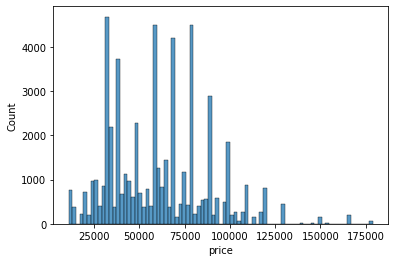

In [14]:
import seaborn as sns
sns.histplot(data=reviews, x="price")

In [15]:
reviews['price'].quantile([0.25,.5,.75])

0.25    39000.0
0.50    59000.0
0.75    78000.0
Name: price, dtype: float64

In [16]:
reviews['price']=reviews['price'].apply(lambda x:'39000 미만' if (x<39000) else '39000~59000' if (x>=39000 and x<=59000)
                       else '59000~78000' if (x >= 59000 and x < 78000) 
                        else '78000 이상')

In [17]:
reviews['price']=reviews['price'].astype('category')
reviews.price = reviews.price.cat.reorder_categories(['39000 미만', '39000~59000','59000~78000', '78000 이상'])
reviews.price.value_counts(sort=False)

39000 미만       13373
39000~59000    15508
59000~78000    10307
78000 이상       16011
Name: price, dtype: int64

In [19]:
reviews['rank'].quantile([0.25,.5,.75])

0.25     49.0
0.50    121.0
0.75    184.0
Name: rank, dtype: float64

In [20]:
reviews['rank']=reviews['rank'].apply(lambda x:'50등 이하' if (x<=50) else '50~120등' if (x>50 and x<=120)
                       else '120~180등' if (x > 120 and x <= 180)
                                      else '180등 이상')

In [21]:
reviews['rank']=reviews['rank'].astype('category')
reviews['rank'] = reviews['rank'].cat.reorder_categories(['50등 이하','50~120등','120~180등','180등 이상'])
reviews['rank'].value_counts(sort=False)

50등 이하      14216
50~120등     13209
120~180등    13492
180등 이상     14282
Name: rank, dtype: int64

reviews 데이터 형태

In [22]:
reviews.head()

,document,score,rank,big_select,small_select,brand,price
0,가볍고 핏이 낙낙해서 레이어드로도 단일로도 잘 입을 수 있겠어요.,1,50등 이하,상의,반팔티셔츠,커버낫,39000~59000
1,m사려다 후기보고 s샀는데 s가 딱 맞네요 얇아서 여름에 입기 좋을거같고 가성비 좋...,0,50등 이하,상의,반팔티셔츠,커버낫,39000~59000
2,검은색 반팔이 없어서 샀는데 너무 잘 산거 같아요. 흰색도 이쁘고 살짝 비춰지긴 한...,0,50등 이하,상의,반팔티셔츠,커버낫,39000~59000
3,깔끔하고 편해서 매일입네요 너무 좋아요 가격도 좋아요,1,50등 이하,상의,반팔티셔츠,커버낫,39000~59000
4,재질이 너무마음에들어요 싼값에 잘건져갑니다,1,50등 이하,상의,반팔티셔츠,커버낫,39000~59000


#### 형태소 분석

In [23]:
from kiwipiepy import Kiwi

In [24]:
kiwi=Kiwi()

In [25]:
# 한단어가 두 단어로 나누어 지는 것들을 따로 사전에 넣어주는 것
kiwi.load_user_dictionary('user_dictionary.txt')

0

In [26]:
kiwi.prepare()

0

In [27]:
def extract_keywords(text):
    result=kiwi.analyze(text)
    for token, pos, start, end in result[0][0]:
        if pos[0] in 'N':
            yield f'{token}'

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

한국어 불용어 데이터를 구글링하였다. https://www.ranks.nl/stopwords/korean \
찾아서 빼주는 코드

In [29]:
korean_stopwords = pd.read_csv('koreanStopwords.txt', sep='\n', header=None)
korean_stopwords.columns=['stopwords']; korean_stopwords.drop_duplicates(inplace=True)
korean_stopwords.reset_index(inplace=True)

max_features 1000개로 하여 한국어불용어 제외하고 학습시킨다.

In [29]:
cv=CountVectorizer(max_features=1000, tokenizer=extract_keywords, stop_words=list(korean_stopwords['stopwords']))

# 단어빈도분석

In [30]:
tdm=cv.fit_transform(reviews['document'])
trans = TfidfTransformer()
tdm2=trans.fit_transform(tdm)

In [31]:
words= cv.get_feature_names()

전체 문서의 단어 빈도 확인

In [32]:
word_count=pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm2.sum(axis=0).flat
})
word_count.sort_values('빈도',ascending=False).head(10)

,단어,빈도
404,사이즈,3397.111651
938,핏,3219.576192
243,만족,1907.691082
304,바지,1907.559170
89,기장,1769.435340
596,옷,1731.592073
419,색감,1716.635016
65,구매,1534.034368
686,재질,1410.678780
418,색,1270.421894


### 상의, 하의 별 단어빈도 확인

In [30]:
reviews_top=reviews[reviews['big_select']=='상의']
reviews_pant=reviews[reviews['big_select']=='바지']

In [31]:
len(reviews_top),len(reviews_pant)

(26016, 29183)

## 상의 바지 별로 순위별 단어빈도 확인

In [35]:
reviews['rank'].value_counts()

180등 이상     14282
50등 이하      14216
120~180등    13492
50~120등     13209
Name: rank, dtype: int64

In [36]:
reviews_top_low=pd.concat([reviews_top[reviews_top['rank']=='50등 이하'],reviews_top[reviews_top['rank']=='50~120등']],axis=0,ignore_index=True)
reviews_top_high=pd.concat([reviews_top[reviews_top['rank']=='120~180등'],reviews_top[reviews_top['rank']=='180등 이상']],axis=0,ignore_index=True)

In [37]:
len(reviews_top_low),len(reviews_top_high)

(12763, 13253)

### 상의 상위권 상품의 단어 빈도 확인

In [38]:
cv_top_low=CountVectorizer(max_features=1000, tokenizer=extract_keywords, stop_words=list(korean_stopwords['stopwords']))

In [39]:
tdm_top_low=cv_top_low.fit_transform(reviews_top_low['document'])
trans = TfidfTransformer()
tdm2_top_low=trans.fit_transform(tdm_top_low)

In [40]:
words_top_low= cv_top_low.get_feature_names()

In [41]:
word_count_top_low=pd.DataFrame({
    '단어': cv_top_low.get_feature_names(),
    '빈도': tdm2_top_low.sum(axis=0).flat
})
word_count_sort=word_count_top_low.sort_values('빈도',ascending=False).reset_index()
word_count_sort.loc[13:23]

,index,단어,빈도
13,94,기장,250.554065
14,882,티,250.164052
15,202,두께,236.155076
16,1,가격,234.265301
17,796,추천,217.369233
18,103,길이,210.805583
19,277,맨투맨,204.086142
20,86,기모,200.562165
21,361,봄,199.808037
22,427,색상,181.479935


In [551]:
count_dic=word_count_top_low.set_index('단어')['빈도'].sort_values(ascending=False)[19:].to_dict()

In [552]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [553]:
cloud = wc.generate_from_frequencies(count_dic)

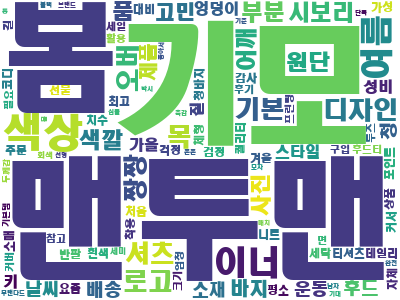

In [135]:
cloud.to_image()

### 상의 하위권상품의 단어 빈도 확인

In [42]:
cv_top_high=CountVectorizer(max_features=1000, tokenizer=extract_keywords, stop_words=list(korean_stopwords['stopwords']))

In [43]:
tdm_top_high=cv_top_high.fit_transform(reviews_top_high['document'])
trans = TfidfTransformer()
tdm2_top_high=trans.fit_transform(tdm_top_high)

In [44]:
words_top_high= cv_top_high.get_feature_names()

In [45]:
word_count_top_high=pd.DataFrame({
    '단어': cv_top_high.get_feature_names(),
    '빈도': tdm2_top_high.sum(axis=0).flat
})
word_count_sort=word_count_top_high.sort_values('빈도',ascending=False).reset_index()
word_count_sort.loc[13:23]

,index,단어,빈도
13,0,가격,285.146771
14,201,두께,277.630065
15,89,기장,272.070678
16,571,여름,259.069216
17,810,추천,232.668840
18,881,티,227.882466
19,96,길이,221.629556
20,453,셔츠,210.534459
21,296,목,204.017773
22,221,디자인,197.329999


In [140]:
count_dic=word_count_top_high.set_index('단어')['빈도'].sort_values(ascending=False)[19:].to_dict()

In [141]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [142]:
cloud = wc.generate_from_frequencies(count_dic)

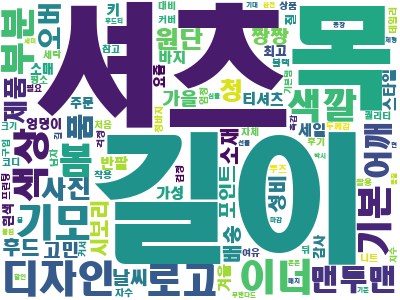

In [143]:
cloud.to_image()

### 바지 상위권 상품의 단어 빈도 확인

In [46]:
reviews_pant_low=pd.concat([reviews_pant[reviews_pant['rank']=='50등 이하'],reviews_pant[reviews_pant['rank']=='50~120등']],axis=0,ignore_index=True)
reviews_pant_high=pd.concat([reviews_pant[reviews_pant['rank']=='120~180등'],reviews_pant[reviews_pant['rank']=='180등 이상']],axis=0,ignore_index=True)

In [47]:
len(reviews_pant_low),len(reviews_pant_high)

(14662, 14521)

In [48]:
cv_pant_low=CountVectorizer(max_features=1000, tokenizer=extract_keywords, stop_words=list(korean_stopwords['stopwords']))

In [49]:
tdm_pant_low=cv_pant_low.fit_transform(reviews_pant_low['document'])
trans = TfidfTransformer()
tdm2_pant_low=trans.fit_transform(tdm_pant_low)

In [50]:
words_pant_low= cv_pant_low.get_feature_names()

In [51]:
word_count_pant_low=pd.DataFrame({
    '단어': cv_pant_low.get_feature_names(),
    '빈도': tdm2_pant_low.sum(axis=0).flat
})
word_count_sort=word_count_pant_low.sort_values('빈도',ascending=False).reset_index()
word_count_sort[8:18]

,index,단어,빈도
8,967,허벅지,347.245549
9,96,길이,346.414653
10,240,맘,341.307577
11,683,재질,316.440390
12,134,느낌,310.196329
13,228,마음,302.376031
14,416,색,300.452537
15,594,와이드,290.023949
16,592,옷,283.690353
17,452,수선,282.407135


In [162]:
count_dic=word_count_pant_low.set_index('단어')['빈도'].sort_values(ascending=False)[8:].to_dict()

In [163]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [164]:
cloud = wc.generate_from_frequencies(count_dic)

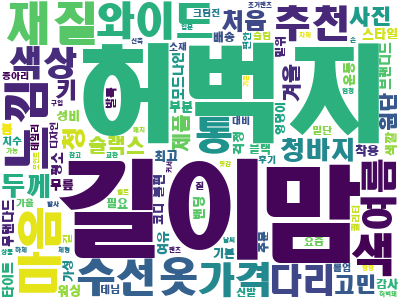

In [165]:
cloud.to_image()

### 바지하위권상품의 단어 빈도 확인

In [52]:
cv_pant_high=CountVectorizer(max_features=1000, tokenizer=extract_keywords, stop_words=list(korean_stopwords['stopwords']))

In [53]:
tdm_pant_high=cv_pant_high.fit_transform(reviews_pant_high['document'])
trans = TfidfTransformer()
tdm2_pant_high=trans.fit_transform(tdm_pant_high)

In [54]:
words_pant_high= cv_pant_high.get_feature_names()

In [55]:
word_count_pant_high=pd.DataFrame({
    '단어': cv_pant_high.get_feature_names(),
    '빈도': tdm2_pant_high.sum(axis=0).flat
})
word_count_sort=word_count_pant_high.sort_values('빈도',ascending=False).reset_index()
word_count_sort.loc[8:18]

,index,단어,빈도
8,570,여름,353.748325
9,466,수선,335.767238
10,970,허벅지,329.328960
11,230,마음,327.986540
12,682,재질,325.122931
13,238,맘,320.113756
14,90,길이,318.951860
15,600,와이드,309.921504
16,424,색,296.535151
17,125,느낌,287.664749


In [65]:
count_dic=word_count_pant_high.set_index('단어')['빈도'].sort_values(ascending=False)[8:].to_dict()

In [66]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [67]:
cloud = wc.generate_from_frequencies(count_dic)

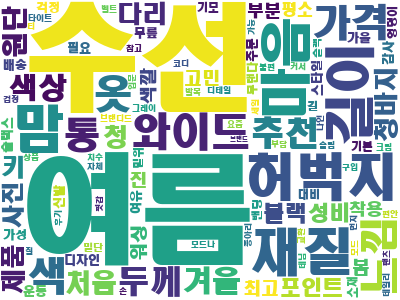

In [68]:
cloud.to_image()

### 가격별 단어빈도 확인

In [56]:
reviews['price'].value_counts()

78000 이상       16011
39000~59000    15508
39000 미만       13373
59000~78000    10307
Name: price, dtype: int64

In [57]:
reviews_top_che=pd.concat([reviews_top[reviews_top['price']=='39000 미만'],reviews_top[reviews_top['price']=='39000~59000']],axis=0,ignore_index=True)
reviews_top_exp=pd.concat([reviews_top[reviews_top['price']=='59000~78000'],reviews_top[reviews_top['price']=='78000 이상']],axis=0,ignore_index=True)

In [58]:
len(reviews_top_che),len(reviews_top_exp)

(15151, 10865)

### 상의 저렴 상품의 단어 빈도 확인

In [59]:
cv_top_che=CountVectorizer(max_features=1000, tokenizer=extract_keywords, stop_words=list(korean_stopwords['stopwords']))

In [60]:
tdm_top_che=cv_top_che.fit_transform(reviews_top_che['document'])
trans = TfidfTransformer()
tdm2_top_che=trans.fit_transform(tdm_top_che)

In [61]:
words_top_che= cv_top_che.get_feature_names()

In [62]:
word_count_top_che=pd.DataFrame({
    '단어': cv_top_che.get_feature_names(),
    '빈도': tdm2_top_che.sum(axis=0).flat
})
word_count_sort=word_count_top_che.sort_values('빈도',ascending=False).reset_index()
word_count_sort.loc[4:17]

,index,단어,빈도
4,247,레이어드,545.988802
5,274,만족,514.245752
6,704,재질,486.299704
7,432,색감,438.678448
8,69,구매,437.459154
9,431,색,374.257818
10,97,기장,349.515023
11,882,티,329.408308
12,277,맘,325.821214
13,571,여름,322.645919


In [183]:
count_dic=word_count_top_che.set_index('단어')['빈도'].sort_values(ascending=False)[4:].to_dict()

In [184]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [185]:
cloud = wc.generate_from_frequencies(count_dic)

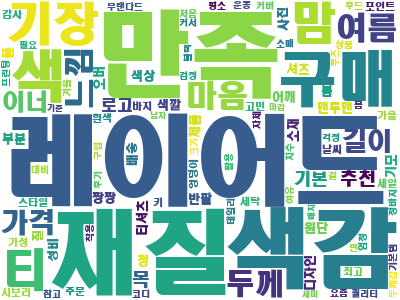

In [186]:
cloud.to_image()

### 상의 비싼 상품의 단어 빈도 확인

In [63]:
cv_top_exp=CountVectorizer(max_features=1000, tokenizer=extract_keywords, stop_words=list(korean_stopwords['stopwords']))

In [64]:
tdm_top_exp=cv_top_exp.fit_transform(reviews_top_exp['document'])
trans = TfidfTransformer()
tdm2_top_exp=trans.fit_transform(tdm_top_exp)

In [65]:
words_top_exp= cv_top_exp.get_feature_names()

In [66]:
word_count_top_exp=pd.DataFrame({
    '단어': cv_top_exp.get_feature_names(),
    '빈도': tdm2_top_exp.sum(axis=0).flat
})
word_count_sort=word_count_top_exp.sort_values('빈도',ascending=False).reset_index()
word_count_sort.loc[4:17]

,index,단어,빈도
4,423,색감,399.012779
5,262,만족,358.943345
6,422,색,298.775898
7,690,재질,290.399671
8,266,맘,280.540291
9,68,구매,277.507803
10,255,마음,266.049461
11,155,느낌,249.579193
12,90,기모,241.578187
13,1,가격,224.405576


In [203]:
count_dic=word_count_top_exp.set_index('단어')['빈도'].sort_values(ascending=False)[8:].to_dict()

In [204]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [205]:
cloud = wc.generate_from_frequencies(count_dic)

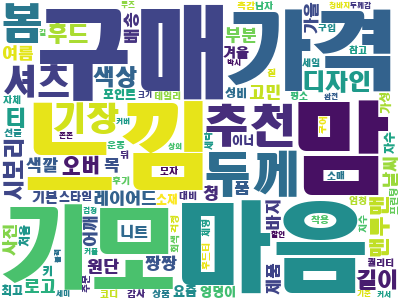

In [206]:
cloud.to_image()

## 바지 가격 별 단어빈도 확인

In [67]:
reviews_pant_che=pd.concat([reviews_pant[reviews_pant['price']=='39000 미만'],reviews_pant[reviews_pant['price']=='39000~59000']],axis=0,ignore_index=True)
reviews_pant_exp=pd.concat([reviews_pant[reviews_pant['price']=='59000~78000'],reviews_pant[reviews_pant['price']=='78000 이상']],axis=0,ignore_index=True)

In [68]:
len(reviews_pant_che),len(reviews_pant_exp)

(13730, 15453)

### 바지 저렴 상품의 단어 빈도 확인

In [69]:
cv_pant_che=CountVectorizer(max_features=1000, tokenizer=extract_keywords, stop_words=list(korean_stopwords['stopwords']))

In [70]:
tdm_pant_che=cv_pant_che.fit_transform(reviews_pant_che['document'])
trans = TfidfTransformer()
tdm2_pant_che=trans.fit_transform(tdm_pant_che)

In [71]:
words_pant_che= cv_pant_che.get_feature_names()

In [72]:
word_count_pant_che=pd.DataFrame({
    '단어': cv_pant_che.get_feature_names(),
    '빈도': tdm2_pant_che.sum(axis=0).flat
})
word_count_sort=word_count_pant_che.sort_values('빈도',ascending=False).reset_index()
word_count_sort.loc[8:18]

,index,단어,빈도
8,686,재질,347.276114
9,109,길이,340.543086
10,595,와이드,331.044893
11,1,가격,329.991157
12,592,옷,301.195476
13,250,맘,296.532564
14,412,색,285.461224
15,967,허벅지,285.028156
16,236,마음,278.751124
17,413,색감,273.591124


In [222]:
count_dic=word_count_pant_che.set_index('단어')['빈도'].sort_values(ascending=False)[8:].to_dict()

In [223]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [224]:
cloud = wc.generate_from_frequencies(count_dic)

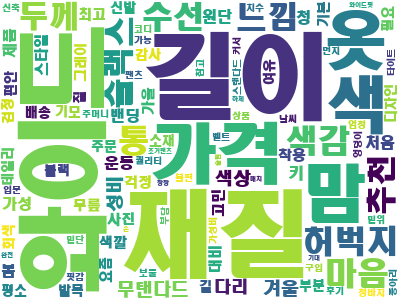

In [225]:
cloud.to_image()

### 바지 비싼 상품의 단어 빈도 확인

In [73]:
cv_pant_exp=CountVectorizer(max_features=1000, tokenizer=extract_keywords, stop_words=list(korean_stopwords['stopwords']))

In [74]:
tdm_pant_exp=cv_pant_exp.fit_transform(reviews_pant_exp['document'])
trans = TfidfTransformer()
tdm2_pant_exp=trans.fit_transform(tdm_pant_exp)

In [75]:
words_pant_exp= cv_pant_exp.get_feature_names()

In [76]:
word_count_pant_exp=pd.DataFrame({
    '단어': cv_pant_exp.get_feature_names(),
    '빈도': tdm2_pant_exp.sum(axis=0).flat
})
word_count_sort=word_count_pant_exp.sort_values('빈도',ascending=False).reset_index()
word_count_sort.loc[8:19]

,index,단어,빈도
8,967,허벅지,393.161449
9,241,맘,367.438877
10,447,수선,362.192755
11,233,마음,352.931321
12,127,느낌,339.415522
13,88,길이,326.972258
14,411,색,312.109968
15,769,청바지,301.138971
16,677,재질,290.407156
17,264,모드나인,287.117722


In [102]:
count_dic=word_count_pant_exp.set_index('단어')['빈도'].sort_values(ascending=False)[8:].to_dict()

In [103]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [104]:
cloud = wc.generate_from_frequencies(count_dic)

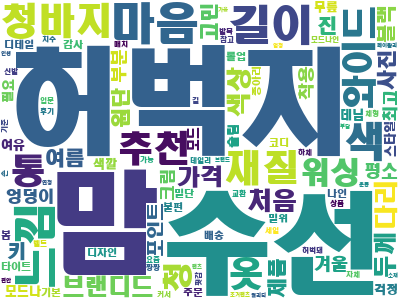

In [105]:
cloud.to_image()

## 상의 순위별 감성분석

상의 상위권

In [583]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [257]:
x=tdm2_top_low

In [258]:
y= reviews_top_low.score.values[:]

In [259]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [260]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [261]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
#optimizer: 모델을 어떻게 학습 시킬것인가(경사하강법), loss: 손실함수(교차엔트로피)

In [262]:
model.fit(x_train.A, y_train, epochs=100, validation_split=0.1, 
         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss')])
#callbacks 특정한 조건이나 상황이 되었을 때 넘겨주라는 것

Epoch 1/100
288/288 [==============================] - 0s 924us/step - loss: 0.6193 - accuracy: 0.8275 - val_loss: 0.5657 - val_accuracy: 0.8355
Epoch 2/100
288/288 [==============================] - 0s 636us/step - loss: 0.5187 - accuracy: 0.8508 - val_loss: 0.5017 - val_accuracy: 0.8355
Epoch 3/100
288/288 [==============================] - 0s 629us/step - loss: 0.4668 - accuracy: 0.8508 - val_loss: 0.4713 - val_accuracy: 0.8355
Epoch 4/100
288/288 [==============================] - 0s 632us/step - loss: 0.4401 - accuracy: 0.8508 - val_loss: 0.4568 - val_accuracy: 0.8355
Epoch 5/100
288/288 [==============================] - 0s 643us/step - loss: 0.4262 - accuracy: 0.8508 - val_loss: 0.4503 - val_accuracy: 0.8355
Epoch 6/100
288/288 [==============================] - 0s 656us/step - loss: 0.4187 - accuracy: 0.8508 - val_loss: 0.4475 - val_accuracy: 0.8355
Epoch 7/100
288/288 [==============================] - 0s 646us/step - loss: 0.4142 - accuracy: 0.8508 - val_loss: 0.4462 - val_ac

In [263]:
model.evaluate(x_test.A,y_test)

80/80 [==============================] - 0s 450us/step - loss: 0.4510 - accuracy: 0.8308


[0.4510289430618286, 0.8307873010635376]

In [264]:
w,b=model.weights
#w 가 양수면 그 단어가 많이 나올 수 록 긍정적인 단어인 것.

In [265]:
word_sent=pd.DataFrame({'토큰':words_top_low,'가중치':w.numpy().flat})

In [266]:
#부정의 단어들
word_sent.sort_values('가중치').head(10)

,토큰,가중치
509,실밥,-0.677929
526,아쉬움,-0.595177
732,주름,-0.573170
762,차이,-0.560136
66,구멍,-0.554898
257,마무리,-0.550889
868,털,-0.539469
890,판,-0.531208
420,상태,-0.526622
374,붕,-0.494951


In [267]:
word_sent1=word_sent.copy()
word_sent1['가중치']=-word_sent1['가중치']

In [268]:
count_dic=word_sent1.set_index('토큰')['가중치'].to_dict()

In [269]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [270]:
cloud = wc.generate_from_frequencies(count_dic)

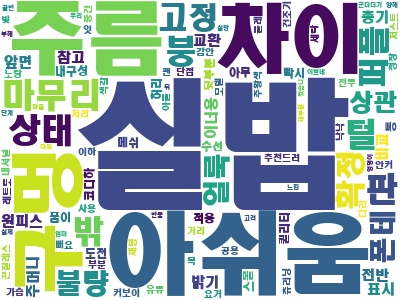

In [271]:
cloud.to_image()

In [272]:
#긍정의 단어들
word_sent.sort_values('가중치').tail(10)

,토큰,가중치
659,이쁩니,0.998946
128,낭낭,1.008764
981,후드,1.087066
765,찰떡,1.095474
271,맘,1.127648
172,대박,1.203026
508,실물,1.252912
543,애용,1.368184
18,감사,1.459407
791,최고,1.630585


In [277]:
count_dic=word_sent.set_index('토큰')['가중치'].to_dict()

In [278]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [279]:
cloud = wc.generate_from_frequencies(count_dic)

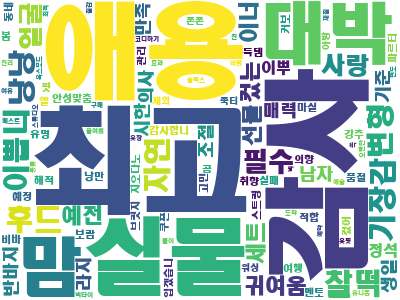

In [280]:
cloud.to_image()

다양한 종류를 가지고 있으면 좋겠다.무신사의 구매자들에게서는 맨투맨이 현재 인기가 많은 것으로 보인다. 자연은 뭘까 변형이 없는 것이 좋다는 것 같다

상의 하위권

In [353]:
x=tdm2_top_high

In [354]:
y= reviews_top_high.score.values[:]

In [355]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [356]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [357]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
#optimizer: 모델을 어떻게 학습 시킬것인가(경사하강법), loss: 손실함수(교차엔트로피)

In [358]:
model.fit(x_train.A, y_train, epochs=100, validation_split=0.1, 
         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss')])
#callbacks 특정한 조건이나 상황이 되었을 때 넘겨주라는 것

Epoch 1/100
299/299 [==============================] - 0s 898us/step - loss: 0.6272 - accuracy: 0.7931 - val_loss: 0.5686 - val_accuracy: 0.8313
Epoch 2/100
299/299 [==============================] - 0s 616us/step - loss: 0.5386 - accuracy: 0.8208 - val_loss: 0.5076 - val_accuracy: 0.8313
Epoch 3/100
299/299 [==============================] - 0s 629us/step - loss: 0.4969 - accuracy: 0.8208 - val_loss: 0.4788 - val_accuracy: 0.8313
Epoch 4/100
299/299 [==============================] - 0s 612us/step - loss: 0.4770 - accuracy: 0.8208 - val_loss: 0.4649 - val_accuracy: 0.8313
Epoch 5/100
299/299 [==============================] - 0s 629us/step - loss: 0.4672 - accuracy: 0.8208 - val_loss: 0.4582 - val_accuracy: 0.8313
Epoch 6/100
299/299 [==============================] - 0s 672us/step - loss: 0.4619 - accuracy: 0.8208 - val_loss: 0.4545 - val_accuracy: 0.8313
Epoch 7/100
299/299 [==============================] - 0s 626us/step - loss: 0.4583 - accuracy: 0.8208 - val_loss: 0.4522 - val_ac

In [359]:
model.evaluate(x_test.A,y_test)

83/83 [==============================] - 0s 410us/step - loss: 0.4515 - accuracy: 0.8284


[0.4514544606208801, 0.8283666372299194]

In [360]:
w,b=model.weights
#w 가 양수면 그 단어가 많이 나올 수 록 긍정적인 단어인 것.

In [361]:
word_sent=pd.DataFrame({'토큰':words_top_high,'가중치':w.numpy().flat})

In [351]:
#부정의 단어들
word_sent.sort_values('가중치').head(10)

,토큰,가중치
25,값,-0.993337
296,목,-0.802352
866,털,-0.799233
506,실밥,-0.782613
372,부분,-0.754608
259,마감,-0.745717
504,실망,-0.739953
708,전반,-0.729624
794,초가을,-0.726110
403,빨래,-0.684674


In [324]:
word_sent1=word_sent.copy()
word_sent1['가중치']=-word_sent1['가중치']

In [325]:
count_dic=word_sent1.set_index('토큰')['가중치'].to_dict()

In [326]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [327]:
cloud = wc.generate_from_frequencies(count_dic)

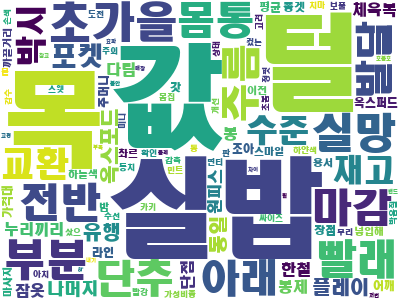

In [328]:
cloud.to_image()

In [362]:
#긍정의 단어들
word_sent.sort_values('가중치').tail(10)

,토큰,가중치
13,가운데,1.112431
741,주변,1.114545
577,여행,1.120723
312,무지티,1.129832
530,아이템,1.263176
712,절기,1.318794
806,최고,1.328025
287,면도,1.333521
320,미니멀,1.419314
621,완벽,1.523325


In [166]:
count_dic=word_sent.set_index('토큰')['가중치'].to_dict()

In [167]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [168]:
cloud = wc.generate_from_frequencies(count_dic)

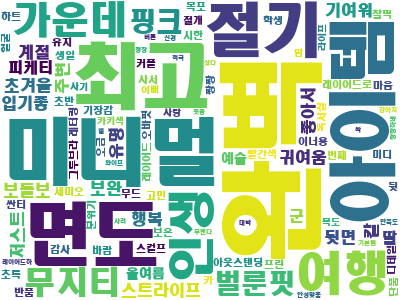

In [169]:
cloud.to_image()

## 상의 가격별 감성분석

상의 저렴 상품

In [401]:
x=tdm2_top_che

In [402]:
y= reviews_top_che.score.values[:]

In [403]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [404]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [405]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
#optimizer: 모델을 어떻게 학습 시킬것인가(경사하강법), loss: 손실함수(교차엔트로피)

In [406]:
model.fit(x_train.A, y_train, epochs=100, validation_split=0.1, 
         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss')])
#callbacks 특정한 조건이나 상황이 되었을 때 넘겨주라는 것

Epoch 1/100
341/341 [==============================] - 0s 856us/step - loss: 0.6157 - accuracy: 0.8083 - val_loss: 0.5561 - val_accuracy: 0.8259
Epoch 2/100
341/341 [==============================] - 0s 619us/step - loss: 0.5183 - accuracy: 0.8314 - val_loss: 0.4960 - val_accuracy: 0.8259
Epoch 3/100
341/341 [==============================] - 0s 654us/step - loss: 0.4761 - accuracy: 0.8314 - val_loss: 0.4720 - val_accuracy: 0.8259
Epoch 4/100
341/341 [==============================] - 0s 683us/step - loss: 0.4579 - accuracy: 0.8314 - val_loss: 0.4625 - val_accuracy: 0.8259
Epoch 5/100
341/341 [==============================] - 0s 669us/step - loss: 0.4495 - accuracy: 0.8314 - val_loss: 0.4588 - val_accuracy: 0.8259
Epoch 6/100
341/341 [==============================] - 0s 651us/step - loss: 0.4450 - accuracy: 0.8314 - val_loss: 0.4573 - val_accuracy: 0.8259
Epoch 7/100
341/341 [==============================] - 0s 634us/step - loss: 0.4421 - accuracy: 0.8314 - val_loss: 0.4567 - val_ac

In [407]:
model.evaluate(x_test.A,y_test)

95/95 [==============================] - 0s 379us/step - loss: 0.4459 - accuracy: 0.8307


[0.4459491968154907, 0.8307489156723022]

In [408]:
w,b=model.weights
#w 가 양수면 그 단어가 많이 나올 수 록 긍정적인 단어인 것.

In [409]:
word_sent=pd.DataFrame({'토큰':words_top_che,'가중치':w.numpy().flat})

In [410]:
#부정의 단어들
word_sent.sort_values('가중치').head(10)

,토큰,가중치
512,실밥,-0.599720
67,교환,-0.583995
547,어깨,-0.530243
872,통,-0.515071
713,전반,-0.480738
868,털,-0.453204
510,실망,-0.436622
301,목,-0.415318
539,안쪽,-0.409046
306,몸통,-0.402616


In [412]:
word_sent1=word_sent.copy()
word_sent1['가중치']=-word_sent1['가중치']

In [413]:
count_dic=word_sent1.set_index('토큰')['가중치'].to_dict()

In [414]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [415]:
cloud = wc.generate_from_frequencies(count_dic)

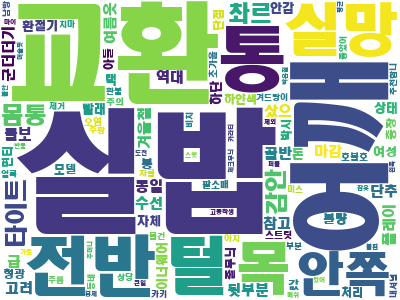

In [416]:
cloud.to_image()

In [417]:
#긍정의 단어들
word_sent.sort_values('가중치').tail(10)

,토큰,가중치
702,재민,0.740793
625,완전,0.743910
655,의향,0.745901
21,감성,0.776524
314,무지티,0.779218
26,강추,0.797373
511,실물,0.851646
807,최고,0.894701
940,핏,0.968001
19,감사,0.983376


In [422]:
count_dic=word_sent.set_index('토큰')['가중치'].to_dict()

In [423]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [424]:
cloud = wc.generate_from_frequencies(count_dic)

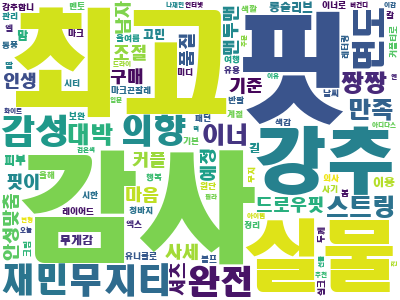

In [425]:
cloud.to_image()

상의 비싼 상품

In [478]:
x=tdm2_top_exp

In [479]:
y= reviews_top_exp.score.values[:]

In [480]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [481]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [482]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
#optimizer: 모델을 어떻게 학습 시킬것인가(경사하강법), loss: 손실함수(교차엔트로피)

In [483]:
model.fit(x_train.A, y_train, epochs=100, validation_split=0.1, 
         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss')])
#callbacks 특정한 조건이나 상황이 되었을 때 넘겨주라는 것

Epoch 1/100
245/245 [==============================] - 0s 979us/step - loss: 0.6312 - accuracy: 0.8090 - val_loss: 0.5744 - val_accuracy: 0.8517
Epoch 2/100
245/245 [==============================] - 0s 645us/step - loss: 0.5433 - accuracy: 0.8367 - val_loss: 0.5066 - val_accuracy: 0.8517
Epoch 3/100
245/245 [==============================] - 0s 633us/step - loss: 0.4943 - accuracy: 0.8367 - val_loss: 0.4692 - val_accuracy: 0.8517
Epoch 4/100
245/245 [==============================] - 0s 645us/step - loss: 0.4675 - accuracy: 0.8367 - val_loss: 0.4483 - val_accuracy: 0.8517
Epoch 5/100
245/245 [==============================] - 0s 645us/step - loss: 0.4524 - accuracy: 0.8367 - val_loss: 0.4362 - val_accuracy: 0.8517
Epoch 6/100
245/245 [==============================] - 0s 641us/step - loss: 0.4437 - accuracy: 0.8367 - val_loss: 0.4295 - val_accuracy: 0.8517
Epoch 7/100
245/245 [==============================] - 0s 635us/step - loss: 0.4383 - accuracy: 0.8367 - val_loss: 0.4253 - val_ac

In [484]:
model.evaluate(x_test.A,y_test)

68/68 [==============================] - 0s 427us/step - loss: 0.4315 - accuracy: 0.8412


[0.4314994215965271, 0.8412333130836487]

In [485]:
w,b=model.weights
#w 가 양수면 그 단어가 많이 나올 수 록 긍정적인 단어인 것.

In [486]:
word_sent=pd.DataFrame({'토큰':words_top_exp,'가중치':w.numpy().flat})

In [487]:
#부정의 단어들
word_sent.sort_values('가중치').head(10)

,토큰,가중치
525,아쉬움,-1.008332
371,부분,-0.785709
508,실밥,-0.745770
723,좋겟,-0.717070
171,단면,-0.636909
354,별로,-0.633928
950,하체,-0.623699
762,차이,-0.609546
273,머,-0.597032
290,목,-0.594833


In [477]:
word_sent1=word_sent.copy()
word_sent1['가중치']=-word_sent1['가중치']

In [227]:
count_dic=word_sent1.set_index('토큰')['가중치'].to_dict()

In [228]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [229]:
cloud = wc.generate_from_frequencies(count_dic)

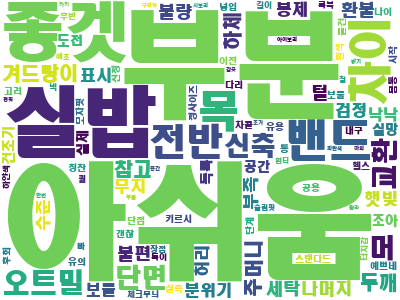

In [230]:
cloud.to_image()

In [488]:
#긍정의 단어들
word_sent.sort_values('가중치').tail(10)

,토큰,가중치
899,패딩,1.055899
346,벌룬핏,1.069382
765,찰떡,1.078075
175,대박,1.081359
268,매력,1.097962
344,번째,1.137994
630,워싱,1.157778
566,엘,1.184154
519,아디다스,1.188546
797,최고,1.764600


In [232]:
count_dic=word_sent.set_index('토큰')['가중치'].to_dict()

In [233]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [234]:
cloud = wc.generate_from_frequencies(count_dic)

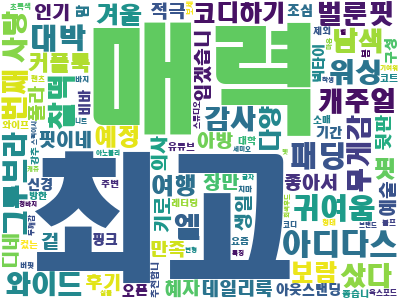

In [235]:
cloud.to_image()

상의감정분석은 score 랑 score1이 둘다 괜찮

## 바지 순위별 감성분석

바지 상위권

In [584]:
x=tdm2_pant_low

In [585]:
y= reviews_pant_low.score.values[:]

In [586]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [587]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [588]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
#optimizer: 모델을 어떻게 학습 시킬것인가(경사하강법), loss: 손실함수(교차엔트로피)

In [589]:
model.fit(x_train.A, y_train, epochs=100, validation_split=0.1, 
         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss')])
#callbacks 특정한 조건이나 상황이 되었을 때 넘겨주라는 것

Epoch 1/100
330/330 [==============================] - 0s 943us/step - loss: 0.6074 - accuracy: 0.8333 - val_loss: 0.5437 - val_accuracy: 0.8474
Epoch 2/100
330/330 [==============================] - 0s 715us/step - loss: 0.5000 - accuracy: 0.8530 - val_loss: 0.4758 - val_accuracy: 0.8474
Epoch 3/100
330/330 [==============================] - 0s 646us/step - loss: 0.4505 - accuracy: 0.8530 - val_loss: 0.4453 - val_accuracy: 0.8474
Epoch 4/100
330/330 [==============================] - 0s 670us/step - loss: 0.4276 - accuracy: 0.8530 - val_loss: 0.4318 - val_accuracy: 0.8474
Epoch 5/100
330/330 [==============================] - 0s 652us/step - loss: 0.4165 - accuracy: 0.8530 - val_loss: 0.4255 - val_accuracy: 0.8474
Epoch 6/100
330/330 [==============================] - 0s 652us/step - loss: 0.4106 - accuracy: 0.8530 - val_loss: 0.4222 - val_accuracy: 0.8474
Epoch 7/100
330/330 [==============================] - 0s 648us/step - loss: 0.4068 - accuracy: 0.8530 - val_loss: 0.4201 - val_ac

In [590]:
model.evaluate(x_test.A,y_test)

92/92 [==============================] - 0s 413us/step - loss: 0.4196 - accuracy: 0.8496


[0.41963353753089905, 0.8496419787406921]

In [591]:
w,b=model.weights
#w 가 양수면 그 단어가 많이 나올 수 록 긍정적인 단어인 것.

In [592]:
word_sent=pd.DataFrame({'토큰':words_pant_low,'가중치':w.numpy().flat})

In [593]:
#부정의 단어들
word_sent.sort_values('가중치').head(10)

,토큰,가중치
524,아쉬움,-1.522803
349,부분,-1.120351
976,환불,-1.054429
23,값,-1.041192
104,낑기,-0.963249
180,뒤,-0.930787
286,밑위,-0.914614
351,부위,-0.909921
190,똥,-0.902305
610,용도,-0.895053


In [524]:
word_sent1=word_sent.copy()
word_sent1['가중치']=-word_sent1['가중치']

In [525]:
count_dic=word_sent1.set_index('토큰')['가중치'].to_dict()

In [526]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [527]:
cloud = wc.generate_from_frequencies(count_dic)

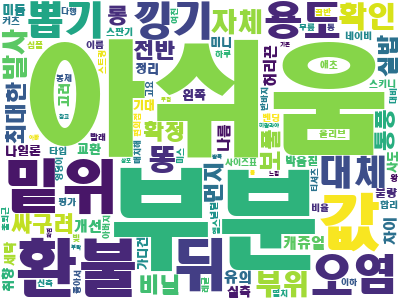

In [528]:
cloud.to_image()

In [594]:
#긍정의 단어들
word_sent.sort_values('가중치').tail(10)

,토큰,가중치
704,정핏,1.584279
268,무드,1.617227
242,맞춤,1.631545
681,장만,1.643837
815,치트키,1.812973
709,제로,1.928102
648,이용,1.998587
262,모드나인,2.034339
63,교복,2.230527
919,품질,2.547422


In [603]:
count_dic=word_sent.set_index('토큰')['가중치'].to_dict()

In [604]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [605]:
cloud = wc.generate_from_frequencies(count_dic)

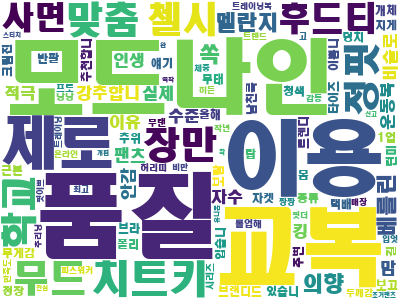

In [606]:
cloud.to_image()

바지 하위권

In [759]:
x=tdm2_pant_high

In [760]:
y= reviews_pant_high.score.values[:]

In [761]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [762]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [763]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
#optimizer: 모델을 어떻게 학습 시킬것인가(경사하강법), loss: 손실함수(교차엔트로피)

In [764]:
model.fit(x_train.A, y_train, epochs=100, validation_split=0.1, 
         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss')])
#callbacks 특정한 조건이나 상황이 되었을 때 넘겨주라는 것

Epoch 1/100
327/327 [==============================] - 0s 945us/step - loss: 0.6158 - accuracy: 0.8117 - val_loss: 0.5589 - val_accuracy: 0.8219
Epoch 2/100
327/327 [==============================] - 0s 661us/step - loss: 0.5188 - accuracy: 0.8335 - val_loss: 0.5007 - val_accuracy: 0.8219
Epoch 3/100
327/327 [==============================] - 0s 682us/step - loss: 0.4758 - accuracy: 0.8335 - val_loss: 0.4769 - val_accuracy: 0.8219
Epoch 4/100
327/327 [==============================] - 0s 682us/step - loss: 0.4567 - accuracy: 0.8335 - val_loss: 0.4673 - val_accuracy: 0.8219
Epoch 5/100
327/327 [==============================] - 0s 679us/step - loss: 0.4476 - accuracy: 0.8335 - val_loss: 0.4634 - val_accuracy: 0.8219
Epoch 6/100
327/327 [==============================] - 0s 667us/step - loss: 0.4424 - accuracy: 0.8335 - val_loss: 0.4617 - val_accuracy: 0.8219
Epoch 7/100
327/327 [==============================] - 0s 670us/step - loss: 0.4390 - accuracy: 0.8335 - val_loss: 0.4608 - val_ac

In [765]:
model.evaluate(x_test.A,y_test)

91/91 [==============================] - 0s 440us/step - loss: 0.4359 - accuracy: 0.8355


[0.43589431047439575, 0.835456132888794]

In [766]:
w,b=model.weights
#w 가 양수면 그 단어가 많이 나올 수 록 긍정적인 단어인 것.

In [767]:
word_sent=pd.DataFrame({'토큰':words_pant_high,'가중치':w.numpy().flat})

In [626]:
#부정의 단어들
word_sent.sort_values('가중치').head(10)

,토큰,가중치
361,부분,-0.849296
558,양말,-0.701329
564,엉덩이,-0.657578
555,야외,-0.638989
93,꼬툭튀,-0.575459
125,느낌,-0.544227
836,커서,-0.544072
985,후기,-0.494821
544,아쉬움,-0.494193
434,선택,-0.487512


In [627]:
word_sent1=word_sent.copy()
word_sent1['가중치']=-word_sent1['가중치']

In [628]:
count_dic=word_sent1.set_index('토큰')['가중치'].to_dict()

In [410]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [411]:
cloud = wc.generate_from_frequencies(count_dic)

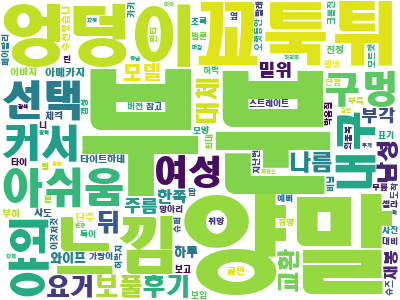

In [412]:
cloud.to_image()

In [768]:
#긍정의 단어들
word_sent.sort_values('가중치').tail(10)

,토큰,가중치
428,생로랑,0.935270
612,요즘,0.941920
216,룩,0.954806
454,셋업,0.977891
991,흑청,1.009424
860,크림진,1.028729
142,대박,1.048289
586,예정,1.120025
795,최고,1.185062
759,찰떡,1.371861


In [414]:
count_dic=word_sent.set_index('토큰')['가중치'].to_dict()

In [415]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [416]:
cloud = wc.generate_from_frequencies(count_dic)

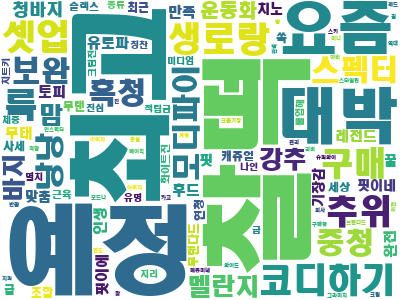

In [417]:
cloud.to_image()

## 바지 가격별 감성분석

바지 저렴

In [889]:
x=tdm2_pant_che

In [890]:
y= reviews_pant_che.score.values[:]

In [891]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [892]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [893]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
#optimizer: 모델을 어떻게 학습 시킬것인가(경사하강법), loss: 손실함수(교차엔트로피)

In [894]:
model.fit(x_train.A, y_train, epochs=100, validation_split=0.1, 
         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss')])
#callbacks 특정한 조건이나 상황이 되었을 때 넘겨주라는 것

Epoch 1/100
309/309 [==============================] - 0s 919us/step - loss: 0.6177 - accuracy: 0.8108 - val_loss: 0.5505 - val_accuracy: 0.8471
Epoch 2/100
309/309 [==============================] - 0s 651us/step - loss: 0.5250 - accuracy: 0.8311 - val_loss: 0.4836 - val_accuracy: 0.8471
Epoch 3/100
309/309 [==============================] - 0s 640us/step - loss: 0.4820 - accuracy: 0.8311 - val_loss: 0.4519 - val_accuracy: 0.8471
Epoch 4/100
309/309 [==============================] - 0s 651us/step - loss: 0.4617 - accuracy: 0.8311 - val_loss: 0.4366 - val_accuracy: 0.8471
Epoch 5/100
309/309 [==============================] - 0s 654us/step - loss: 0.4517 - accuracy: 0.8311 - val_loss: 0.4289 - val_accuracy: 0.8471
Epoch 6/100
309/309 [==============================] - 0s 651us/step - loss: 0.4462 - accuracy: 0.8311 - val_loss: 0.4249 - val_accuracy: 0.8471
Epoch 7/100
309/309 [==============================] - 0s 677us/step - loss: 0.4425 - accuracy: 0.8311 - val_loss: 0.4227 - val_ac

In [895]:
model.evaluate(x_test.A,y_test)

86/86 [==============================] - 0s 442us/step - loss: 0.4221 - accuracy: 0.8452


[0.4221159517765045, 0.84522944688797]

In [896]:
w,b=model.weights
#w 가 양수면 그 단어가 많이 나올 수 록 긍정적인 단어인 것.

In [897]:
word_sent=pd.DataFrame({'토큰':words_pant_che,'가중치':w.numpy().flat})

In [877]:
#부정의 단어들
word_sent.sort_values('가중치').head(10)

,토큰,가중치
359,부분,-0.747469
64,골반,-0.743492
347,별점,-0.716156
367,불량,-0.663052
352,보풀,-0.617642
72,광택,-0.616291
685,재봉,-0.603045
296,밑위,-0.594263
532,아쉬움,-0.564199
953,합리,-0.563929


In [847]:
word_sent1=word_sent.copy()
word_sent1['가중치']=-word_sent1['가중치']

In [834]:
count_dic=word_sent1.set_index('토큰')['가중치'].to_dict()

In [835]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [820]:
cloud = wc.generate_from_frequencies(count_dic)

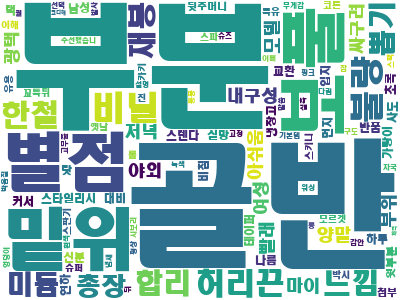

In [821]:
cloud.to_image()

In [898]:
#긍정의 단어들
word_sent.sort_values('가중치').tail(10)

,토큰,가중치
84,구입,0.962026
283,무탠,0.969840
163,대박,0.969978
526,아들,0.971194
581,예정,1.067171
282,무태,1.082790
177,도전,1.115049
598,와이드핏,1.141187
797,최고,1.254256
654,인생,1.312489


In [806]:
count_dic=word_sent.set_index('토큰')['가중치'].to_dict()

In [498]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [499]:
cloud = wc.generate_from_frequencies(count_dic)

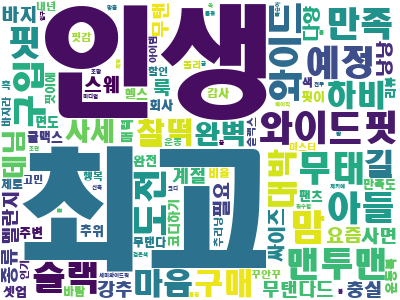

In [500]:
cloud.to_image()

바지 비싼 상품

In [910]:
x=tdm2_pant_exp

In [911]:
y= reviews_pant_exp.score.values[:]

In [912]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [913]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [914]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
#optimizer: 모델을 어떻게 학습 시킬것인가(경사하강법), loss: 손실함수(교차엔트로피)

In [915]:
model.fit(x_train.A, y_train, epochs=100, validation_split=0.1, 
         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss')])
#callbacks 특정한 조건이나 상황이 되었을 때 넘겨주라는 것

Epoch 1/100
348/348 [==============================] - 0s 857us/step - loss: 0.6023 - accuracy: 0.8326 - val_loss: 0.5365 - val_accuracy: 0.8464
Epoch 2/100
348/348 [==============================] - 0s 632us/step - loss: 0.4967 - accuracy: 0.8485 - val_loss: 0.4713 - val_accuracy: 0.8464
Epoch 3/100
348/348 [==============================] - 0s 621us/step - loss: 0.4513 - accuracy: 0.8485 - val_loss: 0.4446 - val_accuracy: 0.8464
Epoch 4/100
348/348 [==============================] - 0s 624us/step - loss: 0.4315 - accuracy: 0.8485 - val_loss: 0.4338 - val_accuracy: 0.8464
Epoch 5/100
348/348 [==============================] - 0s 632us/step - loss: 0.4223 - accuracy: 0.8485 - val_loss: 0.4294 - val_accuracy: 0.8464
Epoch 6/100
348/348 [==============================] - 0s 641us/step - loss: 0.4172 - accuracy: 0.8485 - val_loss: 0.4275 - val_accuracy: 0.8464
Epoch 7/100
348/348 [==============================] - 0s 621us/step - loss: 0.4138 - accuracy: 0.8485 - val_loss: 0.4266 - val_ac

In [916]:
model.evaluate(x_test.A,y_test)

97/97 [==============================] - 0s 433us/step - loss: 0.4071 - accuracy: 0.8512


[0.4070819020271301, 0.8511808514595032]

In [917]:
w,b=model.weights
#w 가 양수면 그 단어가 많이 나올 수 록 긍정적인 단어인 것.

In [918]:
word_sent=pd.DataFrame({'토큰':words_pant_exp,'가중치':w.numpy().flat})

In [919]:
#부정의 단어들
word_sent.sort_values('가중치').head(10)

,토큰,가중치
514,아쉬움,-0.579113
261,모델핏,-0.425892
146,대체,-0.381771
974,확정,-0.353211
828,커츠,-0.348130
266,모양,-0.329723
285,미스,-0.324851
499,실밥,-0.323321
30,개선,-0.317204
136,다행,-0.314029


In [909]:
word_sent1=word_sent.copy()
word_sent1['가중치']=-word_sent1['가중치']

In [512]:
count_dic=word_sent1.set_index('토큰')['가중치'].to_dict()

In [513]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [514]:
cloud = wc.generate_from_frequencies(count_dic)

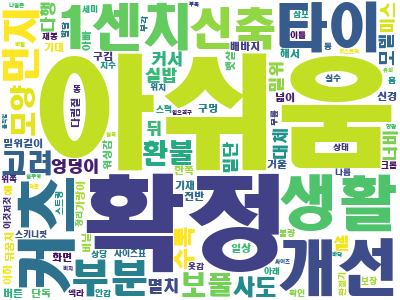

In [515]:
cloud.to_image()

In [920]:
#긍정의 단어들
word_sent.sort_values('가중치').tail(10)

,토큰,가중치
938,핏,0.783256
791,최고,0.809435
241,맘,0.814396
751,쫀쫀,0.821923
37,걱정,0.826162
296,바지,0.846151
853,크림진,0.898782
365,브랜디드,0.933620
18,감사,0.943319
264,모드나인,1.053586


In [921]:
count_dic=word_sent.set_index('토큰')['가중치'].to_dict()

In [922]:
wc = WordCloud(font_path='C:/Windows/Fonts/HMKMRHD.ttf',
               background_color='white',
               max_words=100,
               width=400, height=300)

In [923]:
cloud = wc.generate_from_frequencies(count_dic)

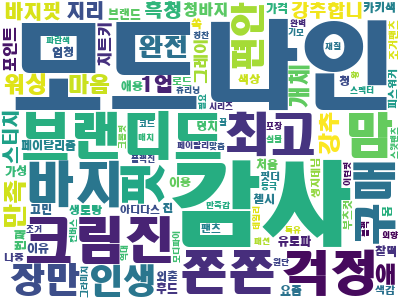

In [924]:
cloud.to_image()

# 주제분석

## LDA 시각화

In [32]:
from gensim.matutils import Sparse2Corpus
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)
warnings.simplefilter('always')

In [33]:
def extract_keywords(text):
    result=kiwi.analyze(text)
    for token, pos, start, end in result[0][0]:
        if pos[0] in 'N':
            yield f'{token}'

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 상의

In [34]:
cv_top=CountVectorizer(max_features=1000, tokenizer=extract_keywords, stop_words=list(korean_stopwords['stopwords']))

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
tdm_top=cv_top.fit_transform(reviews_top['document'])
trans = TfidfTransformer()
tdm2_top=trans.fit_transform(tdm_top)

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\JangSeongHyun\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['가까스', '같습', '개의', '견지', '결과', '결론', '겸사겸', '고려', '공동', '관계', '관련', '구체', '구토', '근거', '기대', '기점', '기준', '까닭', '꽈', '꿀', '나머지', '년도', '대해', '댕', '더군다', '도달', '도착', '동시', '득', '듭', '따름', '떡', '룩', '마디', '망정', '메쓰겁', '면', '몰랏', '무릎', '밖', '반대', '방면', '보드', '부류', '불문', '비걱거리', '비교', '샀습', '상대', '서술', '셀비', '시작', '시초', '써', '아래', '아무', '아무거', '악', '어쨋', '어찌됏', '연관', '연이', '옆', '예쁩', '윗', '의거', '의지', '의해되', '이외', '이용', '이유', '인

In [36]:
words_top= cv_top.get_feature_names()

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
x_top=tdm2_top

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
corpus_top=Sparse2Corpus(x_top.T)

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
#단어사전을 만드는 것
id2token_top=dict(enumerate(words_top))

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
import re

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
def extract_keywords(text):
    result = kiwi.analyze(text)
    for token, pos, start, end in result[0][0]:
        if (pos[0] in 'N' and token not in list(korean_stopwords['stopwords'])):
            yield f'{token}'

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
#docs = 문서별로 단어들 리스트로 묶은것
docs_top=[]
for text in reviews_top.document:
    doc=list(extract_keywords(text))
    docs_top.append(doc)

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
from gensim.corpora.dictionary import Dictionary

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
# 문서별 단어들을 가지고 단어사전을 만들게 된다
dic_top=Dictionary(docs_top)

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
dic_top.filter_extremes(no_below=20, no_above=0.8)

#no_below 10개 이하의 문서에서 나온 단어는 없앤다(너무 적어서) 
#no_above 전체의 90%의 문서에서 나온 단어는 없앤다(너무 흔해서) 

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
corpus_top=[]
for doc in docs_top:
    bow=dic_top.doc2bow(doc)  #bow(bag of words): 단어들이 몇개씩 나왔는지 세서 묶어놓는다
    corpus_top.append(bow)

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
from gensim.models.ldamodel import LdaModel

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
from sklearn.model_selection import train_test_split
train_corpus_top, valid_copus_top =train_test_split(corpus_top, test_size=0.3, random_state=0)
#데이터 분할, LDA 모델에서 추정할때 언제까지 할지 정하기 힘들어
#추정할때마다 validation으로 test 해서 괜찮은지 볼것이다.

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [515]:
new=0
new_1=0
loss_list=[]
coh_list=[]
for i in range(5,30):
    model_top = LdaModel(corpus=train_corpus_top, id2word=dic_top, num_topics=i, random_state=0)
    loss=model_top.log_perplexity(valid_copus_top)
    coh_top=CoherenceModel(model=model_top, corpus= corpus_top, texts=docs_top,dictionary=dic_top, coherence='c_v')
    print('주제 수:',i,'| 혼잡도:',loss,'| 응집도:', coh_top.get_coherence(),
          ' | 이전의 혼잡도와의 차이:', new-loss,' | 이전의 응집도와의 차이:', coh_top.get_coherence()-new_1)
    loss_list.append(loss)
    coh_list.append(coh_top.get_coherence())
    new_1=coh_top.get_coherence()
    new=loss

주제 수: 5 | 혼잡도: -5.5914139796093405 | 응집도: 0.22669673674674273  | 이전의 혼잡도와의 차이: 5.5914139796093405  | 이전의 응집도와의 차이: 0.22669673674674273
주제 수: 6 | 혼잡도: -5.635615698085874 | 응집도: 0.24446786092261394  | 이전의 혼잡도와의 차이: 0.044201718476533536  | 이전의 응집도와의 차이: 0.017771124175871206
주제 수: 7 | 혼잡도: -5.6711104233850795 | 응집도: 0.24419773032615974  | 이전의 혼잡도와의 차이: 0.0354947252992055  | 이전의 응집도와의 차이: -0.0002701305964541989
주제 수: 8 | 혼잡도: -5.68239214988098 | 응집도: 0.24559218948216485  | 이전의 혼잡도와의 차이: 0.011281726495900202  | 이전의 응집도와의 차이: 0.0013944591560051123
주제 수: 9 | 혼잡도: -5.731871663886494 | 응집도: 0.24362137132209305  | 이전의 혼잡도와의 차이: 0.049479514005514424  | 이전의 응집도와의 차이: -0.001970818160071802
주제 수: 10 | 혼잡도: -5.731755914975555 | 응집도: 0.2763278156546025  | 이전의 혼잡도와의 차이: -0.00011574891093957262  | 이전의 응집도와의 차이: 0.032706444332509466
주제 수: 11 | 혼잡도: -5.757072988712724 | 응집도: 0.2597742536865785  | 이전의 혼잡도와의 차이: 0.025317073737169515  | 이전의 응집도와의 차이: -0.01655356196802399
주제 수: 12 | 혼잡도: -5.811471719918161 | 응

In [517]:
top_02=pd.DataFrame({'loss':loss_list, "coh":coh_list})

In [527]:
top_02.index=top_02.index+5

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


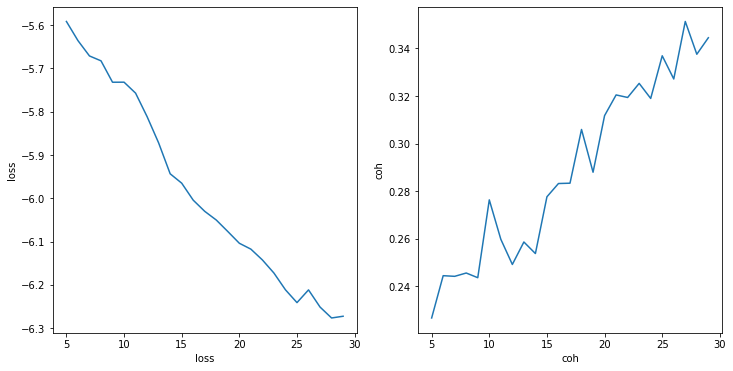

In [633]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.lineplot(data=top_02,x=top_02.index, y="loss",ax=axes[0])
sns.lineplot(data=top_02,x=top_02.index, y="coh",ax=axes[1])
axes[0].set_xlabel('loss')
axes[1].set_xlabel('coh')
plt.show()

In [50]:
model_top = LdaModel(corpus=train_corpus_top, id2word=dic_top, num_topics=9, random_state=0)
#num_topic 주제 수
#id2word  는 번호와 단어가 짝찌어져있는 dic를 넣어준다.
# http://scholar.dkyobobook.co.kr/searchDetail.laf?barcode=4010028210624#

In [51]:
# 혼합성
#교차엔트로피든 혼합성(loss)든 0에 가까워야 좋은 것
loss=model_top.log_perplexity(valid_copus_top)
loss 

-5.731871663886494

In [52]:
import numpy
old_loss=-numpy.inf
while loss >old_loss +0.001:
    model_top.update(train_corpus_top)
    old_loss=loss
    loss=model_top.log_perplexity(valid_copus_top)
    print(loss)
#시간이 많다면 0.1 대신 0.01도 해보자

-5.668610212503187
-5.647355461348646
-5.638638853974005
-5.6356118486488
-5.635416188176641


In [53]:
import pyLDAvis.gensim

In [54]:
import warnings
import pandas as pd
warnings.simplefilter('always')

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
pyLDAvis.enable_notebook()

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
p_top=pyLDAvis.gensim.prepare(model_top, corpus_top, dic_top, sort_topics=False)

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [57]:
pyLDAvis.display(p_top)
#Slide to adjust relevance metric 1에 가까우면 절대적으로 이 주제에 많이 나오는 것
#                                 0에 가까우면 상대적으로 평소에 덜 나오는 단어에 따라 달라짐, 주로 0.6정도가 좋은데 한번 해보고 판단 (관련성)
#현저성(Salient)은 쓰임새도 많으면서 주제에 영향이 큰 단어가 현저성이 높다고 한다.

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
from gensim.models import CoherenceModel

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
coh=CoherenceModel(model=model_top, corpus= corpus_top, texts=docs_top, dictionary=dic_top, coherence='c_v')
coh.get_coherence()
#응집도 계산 높으면 높을수록 좋은 것이다.

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.27396393046849254

In [60]:
#다양도 분석 - 주제마다 25개의 상위단어를 본다
topn=25
top_words=set()

for topic in range(model_top.num_topics):
    for word, prob in model_top.show_topic(topic, topn=topn):
        top_words.add(word)

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
len(top_words)

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


177

In [63]:
len(top_words)/(25*9)
# 주제별 상위 25개의 단어를 결합하였는데 중복된것을 뺐더니 2500개 중 42%만 남았다
# 주제의 다양도가 42%인것이다.
# 다양도 또한 높을수록 좋은 것이다.

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.7866666666666666

하의

In [64]:
def extract_keywords(text):
    result=kiwi.analyze(text)
    for token, pos, start, end in result[0][0]:
        if pos[0] in 'N':
            yield f'{token}'

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
cv_pant=CountVectorizer(max_features=1000, tokenizer=extract_keywords, stop_words=list(korean_stopwords['stopwords']))

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
tdm_pant=cv_pant.fit_transform(reviews_pant['document'])
trans = TfidfTransformer()
tdm2_pant=trans.fit_transform(tdm_pant)

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\JangSeongHyun\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['가까스', '같습', '개의', '견지', '결과', '결론', '겸사겸', '고려', '공동', '관계', '관련', '구체', '구토', '근거', '기대', '기점', '기준', '까닭', '꽈', '꿀', '나머지', '년도', '대해', '댕', '더군다', '도달', '도착', '동시', '득', '듭', '따름', '떡', '룩', '마디', '망정', '메쓰겁', '면', '몰랏', '무릎', '밖', '반대', '방면', '보드', '부류', '불문', '비걱거리', '비교', '샀습', '상대', '서술', '셀비', '시작', '시초', '써', '아래', '아무', '아무거', '악', '어쨋', '어찌됏', '연관', '연이', '옆', '예쁩', '윗', '의거', '의지', '의해되', '이외', '이용', '이유', '인

In [67]:
words_pant= cv_pant.get_feature_names()

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
x_pant=tdm2_pant

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
corpus_pant=Sparse2Corpus(x_pant.T)

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
#단어사전을 만드는 것
id2token_pant=dict(enumerate(words_pant))

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
import re

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
def extract_keywords(text):
    result = kiwi.analyze(text)
    for token, pos, start, end in result[0][0]:
        if (pos[0] in 'N' and token not in list(korean_stopwords['stopwords'])):
            yield f'{token}'

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
#docs = 문서별로 단어들 리스트로 묶은것
docs_pant=[]
for text in reviews_pant.document:
    doc=list(extract_keywords(text))
    docs_pant.append(doc)

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
from gensim.corpora.dictionary import Dictionary

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
# 문서별 단어들을 가지고 단어사전을 만들게 된다
dic_pant=Dictionary(docs_pant)

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
dic_pant.filter_extremes(no_below=20, no_above=0.8)

#no_below 10개 이하의 문서에서 나온 단어는 없앤다(너무 적어서) ################ 이걸 고쳐보자
#no_above 전체의 90%의 문서에서 나온 단어는 없앤다(너무 흔해서) ############## 이것도

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
corpus_pant=[]
for doc in docs_pant:
    bow=dic_pant.doc2bow(doc)  #bow(bag of words): 단어들이 몇개씩 나왔는지 세서 묶어놓는다
    corpus_pant.append(bow)

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
from gensim.models.ldamodel import LdaModel

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
from sklearn.model_selection import train_test_split
train_corpus_pant, valid_copus_pant =train_test_split(corpus_pant, test_size=0.3, random_state=0)
#데이터 분할, LDA 모델에서 추정할때 언제까지 할지 정하기 힘들어
#추정할때마다 validation으로 test 해서 괜찮은지 볼것이다.

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [619]:
new=0
new_1=0
loss_list=[]
coh_list=[]
for i in range(5,20):
    model_pant = LdaModel(corpus=train_corpus_pant, id2word=dic_pant, num_topics=i, random_state=0)
    loss=model_pant.log_perplexity(valid_copus_pant)
    coh_pant=CoherenceModel(model=model_pant, corpus= corpus_pant, texts=docs_pant,dictionary=dic_pant, coherence='c_v')
    print('주제 수:',i,'| 혼잡도:',loss,'| 응집도:', coh_pant.get_coherence(),
          ' | 이전의 혼잡도와의 차이:', new-loss,' | 이전의 응집도와의 차이:', coh_pant.get_coherence()-new_1)
    loss_list.append(loss)
    coh_list.append(coh_pant.get_coherence())
    new_1=coh_pant.get_coherence()
    new=loss

주제 수: 5 | 혼잡도: -5.5243572063294675 | 응집도: 0.26389728745307234  | 이전의 혼잡도와의 차이: 5.5243572063294675  | 이전의 응집도와의 차이: 0.26389728745307234
주제 수: 6 | 혼잡도: -5.550707500797517 | 응집도: 0.2721701554916145  | 이전의 혼잡도와의 차이: 0.026350294468049817  | 이전의 응집도와의 차이: 0.008272868038542158
주제 수: 7 | 혼잡도: -5.584073834596026 | 응집도: 0.28300494633670187  | 이전의 혼잡도와의 차이: 0.03336633379850884  | 이전의 응집도와의 차이: 0.010834790845087372
주제 수: 8 | 혼잡도: -5.593146090503974 | 응집도: 0.28132401047922323  | 이전의 혼잡도와의 차이: 0.009072255907947913  | 이전의 응집도와의 차이: -0.0016809358574786382
주제 수: 9 | 혼잡도: -5.644868678911184 | 응집도: 0.26991462470448613  | 이전의 혼잡도와의 차이: 0.05172258840720989  | 이전의 응집도와의 차이: -0.011409385774737102
주제 수: 10 | 혼잡도: -5.663208931645286 | 응집도: 0.2801313909866744  | 이전의 혼잡도와의 차이: 0.018340252734102336  | 이전의 응집도와의 차이: 0.010216766282188261
주제 수: 11 | 혼잡도: -5.692313441134768 | 응집도: 0.2634653282607777  | 이전의 혼잡도와의 차이: 0.029104509489481956  | 이전의 응집도와의 차이: -0.016666062725896713
주제 수: 12 | 혼잡도: -5.721464812147126 | 응집도: 

In [575]:
pant_02=pd.DataFrame({'loss':loss_list, "coh":coh_list})

In [635]:
pant_02.index=pant_02.index+5

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


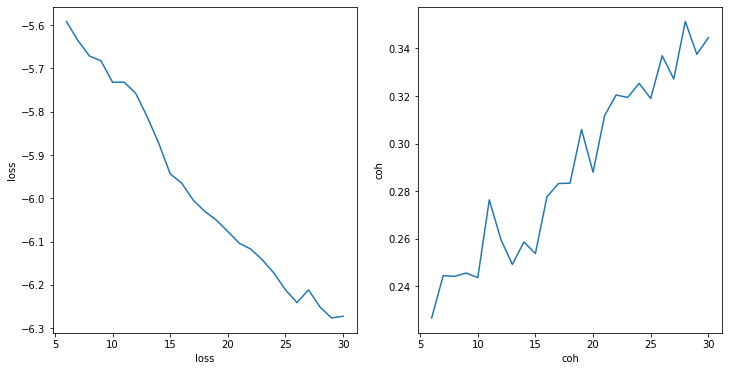

In [636]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.lineplot(data=top_02,x=pant_02.index, y="loss",ax=axes[0])
sns.lineplot(data=top_02,x=pant_02.index, y="coh",ax=axes[1])
axes[0].set_xlabel('loss')
axes[1].set_xlabel('coh')
plt.show()

In [81]:
model_pant = LdaModel(corpus=train_corpus_pant, id2word=dic_pant, num_topics=8, random_state=0)
#num_topic 주제 수
#id2word  는 번호와 단어가 짝찌어져있는 dic를 넣어준다.
# http://scholar.dkyobobook.co.kr/searchDetail.laf?barcode=4010028210624#

In [82]:
# 혼합성
#교차엔트로피든 혼합성(loss)든 0에 가까워야 좋은 것
loss=model_pant.log_perplexity(valid_copus_pant)
loss

-5.593146090503974

In [83]:
import numpy
old_loss=-numpy.inf
while loss >old_loss +0.001:
    model_pant.update(train_corpus_pant)
    old_loss=loss
    loss=model_pant.log_perplexity(valid_copus_pant)
    print(loss)
#시간이 많다면 0.1 대신 0.01도 해보자

-5.545334198902479
-5.531768515720522
-5.528198323210122
-5.527500324207666


In [84]:
import pyLDAvis.gensim

In [85]:
import warnings
import pandas as pd
warnings.simplefilter('always')

In [86]:
pyLDAvis.enable_notebook()

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
p_pant=pyLDAvis.gensim.prepare(model_pant, corpus_pant, dic_pant, sort_topics=False)

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
pyLDAvis.display(p_pant)
#Slide to adjust relevance metric 1에 가까우면 절대적으로 이 주제에 많이 나오는 것
#                                 0에 가까우면 상대적으로 평소에 덜 나오는 단어에 따라 달라짐, 주로 0.6정도가 좋은데 한번 해보고 판단 (관련성)
#현저성(Salient)은 쓰임새도 많으면서 주제에 영향이 큰 단어가 현저성이 높다고 한다.

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
from gensim.models import CoherenceModel

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [90]:
coh=CoherenceModel(model=model_pant, corpus= corpus_pant, texts=docs_pant, dictionary=dic_pant, coherence='c_v')
coh.get_coherence()
#응집도 계산 높으면 높을수록 좋은 것이다.

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.32557768228416223

In [91]:
#다양도 분석 - 주제마다 25개의 상위단어를 본다
topn=25
top_words=set()

for topic in range(model_pant.num_topics):
    for word, prob in model_pant.show_topic(topic, topn=topn):
        top_words.add(word)

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
len(top_words)

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


149

In [93]:
len(top_words)/(25*8)
# 주제별 상위 25개의 단어를 결합하였는데 중복된것을 뺐더니 2500개 중 42%만 남았다
# 주제의 다양도가 42%인것이다.
# 다양도 또한 높을수록 좋은 것이다.

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.745